# Quickstart

## from function to GUI

The core feature of `magicgui` is the [@magicgui](magicgui.magicgui) decorator, which, when used to
decorate a function, will autogenerate a graphical user interface (GUI) by inspecting
the function signature and adding an appropriate GUI widget for each argument.  Argument
`types` are taken from [type hints](https://docs.python.org/3/library/typing.html) if
provided, or inferred using the type of the  default value.

In [1]:
import math
from enum import Enum
from magicgui import magicgui

# dropdown boxes are best made by creating an enum
class Medium(Enum):
    Glass = 1.520
    Oil = 1.515
    Water = 1.333
    Air = 1.0003

# decorate your function with the ``@magicgui`` decorator
@magicgui(call_button="calculate")
def snells_law(aoi=30.0, n1=Medium.Glass, n2=Medium.Water, degrees=True):
    aoi = math.radians(aoi) if degrees else aoi
    try:
        result = math.asin(n1.value * math.sin(aoi) / n2.value)
        return math.degrees(result) if degrees else result
    except ValueError:
        # beyond the critical angle
        return "Total internal reflection!"

### et voilà

The object returned by the `magicgui` decorator is an instance of {py:class}`~magicgui.widgets.FunctionGui`.  It can still be called like the original function, but it also knows how to present itself as a GUI:

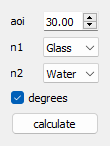

In [2]:
snells_law.show()

## two-way data binding

The fun is just beginning! The modified `snells_law` object has attributes named
after each of the parameters in the function.  As you make changes in your GUI,
the attributes of the `snells_law` object will be kept in sync.  For instance,
change the first dropdown menu from "Glass" to "Oil", and the corresponding
parameter on `snells_law` will change:

In [3]:
snells_law.n1.value

<Medium.Glass: 1.52>

It goes both ways: set a parameter in the console and it will change in the GUI:

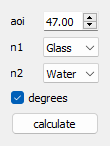

In [4]:
snells_law.aoi.value = 47
snells_law.show()

## calling the function

We can call our function in a few ways:

* Because we provided the `call_button="calculate"` argument to the
  [magicgui](magicgui.magicgui) decorator, a new button was created that will
  execute the function with the current gui parameters when clicked.

* We can also directly call the original function as usual. Now however, the
  current values from the GUI will be used as the default values for any
  arguments that are not explicitly provided to the function.

In [5]:
snells_law()

56.506840116614576

In [6]:
snells_law.aoi.value = 12
snells_law()

13.714180703370369

  In a sense, your original function now has a "living" signature whose
  defaults change as the user interacts with your GUI.

In [7]:
import inspect

inspect.signature(snells_law)
# notice how the default `aoi` is now 12

<MagicSignature (aoi=12.0, n1=<Medium.Glass: 1.52>, n2=<Medium.Water: 1.333>, degrees=True)>

* You can still override positional or keyword arguments in the original function, just
  as you would with a regular function.  (Note: calling the function with values that
  differ from the GUI will *not* set the values in the GUI... It's just a one-time
  call).

In [8]:
# in radians, overriding the value for the second medium (n2)
snells_law(0.8, n2=Medium.Air, degrees=False)

'Total internal reflection!'

## connecting events

### function calls

With a GUI, you are usually looking for something to happen as a result of
calling the function.  The function will have a new `called` attribute that you
can `connect` to an arbitrary callback function:

In [9]:
@snells_law.called.connect
def my_callback(value: str):
    # The callback receives an `Event` object that has the result
    # of the function call in the `value` attribute
    print(f"Your function was called! The result is: {value}")

result = snells_law()

Your function was called! The result is: 13.714180703370369


Now when you call `snells_law()`, or click the `calculate` button
in the gui, `my_callback` will be called with an event object that
contains result of the calculation in its `value` attribute.

### parameter changes

You can also listen for changes on individual function parameters by connecting
to the `<parameter>.changed` signal:

In [10]:
# whenever the current value for n1 changes, print it to the console:
@snells_law.n1.changed.connect
def _on_n1_changed(x: Medium):
    print(f"changed to {x}")

snells_law.n1.value = Medium.Air

changed to Medium.Air


```{note}
This signal will be emitted regardless of whether the parameter was changed in
the GUI or via by [directly setting the paramaeter on the gui
instance](#two-way-data-binding).
```

## @optional

Remember, `@decorators` are just [syntactic
sugar](https://en.wikipedia.org/wiki/Syntactic_sugar): you don't have to use [magicgui](magicgui.magicgui)
to decorate your function declaration. You can also just [call it with your function as
an argument](https://realpython.com/lessons/syntactic-sugar/):

This:

```python
@magicgui(**kwargs)
def function()
    pass
```

is equivalent to this:

```python
def function()
    pass

function = magicgui(function, **kwargs)
```

## configuration and advanced usage

The `@magicgui` decorator takes a number of options that allow you to configure the GUI
and it's behavior.  See [configuration](usage/configuration) for more information.